In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

### Summary statistics

In [2]:
df = pd.read_excel('19-01-04_Séjours_2018.xlsb', engine='pyxlsb')

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,idstay,idstay_to,type_stay_lbl,resinternet,type_guest,extract_date,resdate,camping_code,camping_label,Région,type_hebergement,hebergement,hebergement_label,datein,dateout,los,nbroom,nbguest,nb_nuit_fid,Séjour Gratuit,Nb Nuits Payantes,vrai_date_resa,client_id_grp,client_name,rev1,rev2,rev3,rev4,rev5,rev,fid_id,pays,region,fidelisation,date_fid,camping_fid,creation_date,segment,scode1,scode2,hebergement_camping_id,hebergement_camping_lbl
0,320-14150,NaN,INDIV DIRECT,U20130628DEBUR932214355,N,43220.0,43040.0,59.0,TURISCAMPO,Portugal,LOCA,8.0,Locatif 3 ch. 4 *,43191.0,43220.0,29.0,1.0,1.0,0.0,0.0,29.0,41453.0,1939194.0,XXXXX,670.00,0.0,70.0,0.0,0.0,740.00,1.001500e+11,BE,7322,Y,42005.0,100.0,41212.0,DIRECT,Village,Village,999999.0,LOCA - Not Defined
1,320-19097,NaN,INDIV DIRECT,U20131119GRIME393582153,N,43136.0,42675.0,59.0,TURISCAMPO,Portugal,EMPL,2.0,Emplacement nu de 0 à 3 *,43072.0,43136.0,64.0,1.0,2.0,0.0,0.0,64.0,41597.0,1675500.0,XXXXX,915.64,0.0,0.0,0.0,0.0,915.64,5.912000e+10,GB,PO381NX,Y,41275.0,59.0,40835.0,DIRECT,Village,Village,999998.0,EMPL - Not Defined
2,320-20471,NaN,INDIV DIRECT,U20140228HINDL599191284,N,43327.0,43040.0,59.0,TURISCAMPO,Portugal,EMPL,2.0,Emplacement nu de 0 à 3 *,43101.0,43165.0,64.0,1.0,2.0,0.0,0.0,64.0,41698.0,1664127.0,XXXXX,1074.66,0.0,64.0,0.0,0.0,1138.66,5.917000e+10,GB,NaN,Y,42736.0,59.0,40835.0,DIRECT,Village,Village,22.0,Empla. Super Deluxe *** Luz
3,320-22588,NaN,INDIV DIRECT,U20140528ENGEL311651611,N,43261.0,43040.0,59.0,TURISCAMPO,Portugal,EMPL,2.0,Emplacement nu de 0 à 3 *,43191.0,43252.0,61.0,1.0,2.0,0.0,0.0,61.0,41787.0,1686399.0,XXXXX,901.00,0.0,0.0,0.0,0.0,901.00,1.001700e+11,DE,49740,Y,43101.0,100.0,40835.0,DIRECT,Village,Village,999998.0,EMPL - Not Defined
4,320-22610,NaN,INDIV DIRECT,U20140529SRCOL428189086,N,43078.0,42675.0,59.0,TURISCAMPO,Portugal,LOCA,10.0,Locatif 2 ch. PREMIUM,43074.0,43078.0,4.0,1.0,2.0,0.0,0.0,4.0,41788.0,-1.0,XXXXX,0.00,0.0,0.0,0.0,0.0,0.00,0.000000e+00,PT,NaN,N,NaN,0.0,39721.0,DIRECT,Village,Village,999999.0,LOCA - Not Defined


In [4]:
df.shape

(312552, 42)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312552 entries, 0 to 312551
Data columns (total 42 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   idstay                   305235 non-null  object 
 1   idstay_to                3116 non-null    object 
 2   type_stay_lbl            305235 non-null  object 
 3   resinternet              304637 non-null  object 
 4   type_guest               305235 non-null  object 
 5   extract_date             305235 non-null  float64
 6   resdate                  305235 non-null  float64
 7   camping_code             305235 non-null  float64
 8   camping_label            305235 non-null  object 
 9   Région                   305235 non-null  object 
 10  type_hebergement         305235 non-null  object 
 11  hebergement              305235 non-null  float64
 12  hebergement_label        305235 non-null  object 
 13  datein                   305235 non-null  float64
 14  date

In [40]:
df.describe()

,extract_date,resdate,camping_code,hebergement,datein,dateout,los,nbroom,nbguest,nb_nuit_fid,Séjour Gratuit,Nb Nuits Payantes,vrai_date_resa,client_id_grp,rev1,rev2,rev3,rev4,rev5,rev,fid_id,date_fid,camping_fid,creation_date,hebergement_camping_id
count,305235.000000,305235.000000,305235.000000,305235.000000,305235.000000,305235.000000,305235.00000,305235.0,305235.000000,305235.000000,305235.000000,305235.000000,305235.000000,3.052350e+05,305235.000000,305235.000000,305235.00000,305235.000000,305235.000000,305235.000000,3.052350e+05,118366.000000,305235.000000,305235.000000,305235.000000
mean,43299.119341,43212.494268,45.445725,4.789746,43289.007031,43295.507881,6.50085,1.0,3.460612,0.072908,0.005452,6.427942,43210.936000,2.643037e+06,583.742852,3.932891,38.68114,8.233819,0.000885,634.591586,2.966033e+10,42208.776591,31.281232,42286.529530,286923.124783
std,51.286247,91.420644,31.288675,3.000703,49.553522,50.072155,7.00520,0.0,1.336851,0.464705,0.073633,7.002484,95.699663,1.032134e+06,739.653708,9.569056,85.01661,9.042442,0.162899,765.081456,4.334142e+10,992.933777,44.115905,1250.907792,452318.103607
min,43041.000000,42675.000000,1.000000,2.000000,43040.000000,43041.000000,1.00000,1.0,1.000000,0.000000,0.000000,-4.000000,41031.000000,-1.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,39814.000000,0.000000,36555.000000,1.000000
25%,43261.000000,43139.000000,18.000000,2.000000,43253.000000,43259.000000,2.00000,1.0,2.000000,0.000000,0.000000,2.000000,43139.000000,2.135159e+06,102.000000,0.000000,0.00000,2.400000,0.000000,121.600000,0.000000e+00,41640.000000,0.000000,41655.000000,4.000000
50%,43308.000000,43220.000000,39.000000,5.000000,43295.000000,43303.000000,5.00000,1.0,4.000000,0.000000,0.000000,5.000000,43220.000000,3.199374e+06,288.000000,0.000000,0.00000,6.000000,0.000000,329.040000,0.000000e+00,42736.000000,0.000000,42956.000000,12.000000
75%,43338.000000,43284.000000,67.000000,6.000000,43327.000000,43335.000000,8.00000,1.0,4.000000,0.000000,0.000000,8.000000,43284.000000,3.381626e+06,777.000000,0.000000,38.00000,11.000000,0.000000,885.600000,9.817000e+10,43101.000000,100.000000,43229.000000,999998.000000
max,43467.000000,43404.000000,111.000000,15.000000,43404.000000,43658.000000,364.00000,1.0,54.000000,10.000000,1.000000,364.000000,43448.000000,3.539606e+06,12753.000000,138.000000,4699.53000,274.560000,30.000000,12810.720000,1.140900e+11,43466.000000,114.000000,43433.000000,999999.000000


In [7]:
# Total number of campings

len(df['camping_label'].value_counts())

79

#### TODO: add summary statistics for categorical (Nir solution exam EDA)

### Missing values

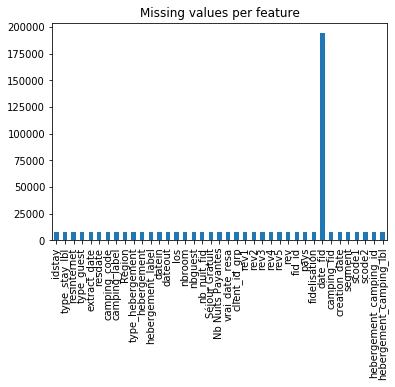

In [41]:
df.isnull().sum().plot.bar()
plt.title('Missing values per feature');

In [19]:
df = df.drop(['idstay_to'], axis=1)

# We drop idstay_to. Since we have the historical data from 2018 we won't drop region and date fid yet


KeyError: "['idstay_to'] not found in axis"

In [21]:
df['client_name'].value_counts()

XXXXX    305235
Name: client_name, dtype: int64

In [22]:
df = df.drop(['client_name'], axis=1)

In [23]:
df.shape

(312552, 40)

In [36]:
sum(df['region'].isnull())/len(df)

0.7235276050065269

In [37]:
df = df.drop(['region'], axis=1)

In [42]:
df['idstay'].value_counts()

792-10453    1
776-576      1
756-859      1
738-3216     1
745-4648     1
            ..
760-3144     1
760-19028    1
720-28       1
745-1408     1
773-6356     1
Name: idstay, Length: 305235, dtype: int64

In [43]:
# No duplicates for bookings.

Since idstay is not a feature and even less numerical continuous we will drop the column.

In [44]:
df.head()

,idstay,type_stay_lbl,resinternet,type_guest,extract_date,resdate,camping_code,camping_label,Région,type_hebergement,hebergement,hebergement_label,datein,dateout,los,nbroom,nbguest,nb_nuit_fid,Séjour Gratuit,Nb Nuits Payantes,vrai_date_resa,client_id_grp,rev1,rev2,rev3,rev4,rev5,rev,fid_id,pays,fidelisation,date_fid,camping_fid,creation_date,segment,scode1,scode2,hebergement_camping_id,hebergement_camping_lbl
0,320-14150,INDIV DIRECT,U20130628DEBUR932214355,N,43220.0,43040.0,59.0,TURISCAMPO,Portugal,LOCA,8.0,Locatif 3 ch. 4 *,43191.0,43220.0,29.0,1.0,1.0,0.0,0.0,29.0,41453.0,1939194.0,670.00,0.0,70.0,0.0,0.0,740.00,1.001500e+11,BE,Y,42005.0,100.0,41212.0,DIRECT,Village,Village,999999.0,LOCA - Not Defined
1,320-19097,INDIV DIRECT,U20131119GRIME393582153,N,43136.0,42675.0,59.0,TURISCAMPO,Portugal,EMPL,2.0,Emplacement nu de 0 à 3 *,43072.0,43136.0,64.0,1.0,2.0,0.0,0.0,64.0,41597.0,1675500.0,915.64,0.0,0.0,0.0,0.0,915.64,5.912000e+10,GB,Y,41275.0,59.0,40835.0,DIRECT,Village,Village,999998.0,EMPL - Not Defined
2,320-20471,INDIV DIRECT,U20140228HINDL599191284,N,43327.0,43040.0,59.0,TURISCAMPO,Portugal,EMPL,2.0,Emplacement nu de 0 à 3 *,43101.0,43165.0,64.0,1.0,2.0,0.0,0.0,64.0,41698.0,1664127.0,1074.66,0.0,64.0,0.0,0.0,1138.66,5.917000e+10,GB,Y,42736.0,59.0,40835.0,DIRECT,Village,Village,22.0,Empla. Super Deluxe *** Luz
3,320-22588,INDIV DIRECT,U20140528ENGEL311651611,N,43261.0,43040.0,59.0,TURISCAMPO,Portugal,EMPL,2.0,Emplacement nu de 0 à 3 *,43191.0,43252.0,61.0,1.0,2.0,0.0,0.0,61.0,41787.0,1686399.0,901.00,0.0,0.0,0.0,0.0,901.00,1.001700e+11,DE,Y,43101.0,100.0,40835.0,DIRECT,Village,Village,999998.0,EMPL - Not Defined
4,320-22610,INDIV DIRECT,U20140529SRCOL428189086,N,43078.0,42675.0,59.0,TURISCAMPO,Portugal,LOCA,10.0,Locatif 2 ch. PREMIUM,43074.0,43078.0,4.0,1.0,2.0,0.0,0.0,4.0,41788.0,-1.0,0.00,0.0,0.0,0.0,0.0,0.00,0.000000e+00,PT,N,NaN,0.0,39721.0,DIRECT,Village,Village,999999.0,LOCA - Not Defined


In [45]:
df = df.drop(['idstay'], axis = 1)

In [46]:
df.shape

(312552, 38)

In [47]:
df['resinternet'].value_counts()

U20180829CHAUL748275756     2
U20180107CELAI165643310     2
U20180615AVANT793621826     2
O20180601VERBA943428973     2
U20180130CRIEL806695556     1
                           ..
O20180226GONZA1542481352    1
U20180624SANSE443157958     1
O20180311JAMME529437600     1
U20180410TRUST973715209     1
O20180309FASSI2116402442    1
Name: resinternet, Length: 304633, dtype: int64

We have four duplicate values for interned reservation id. We will drop these rows.